In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.load('./data_for_xi_calculation/dX_data_t=50_to_t=100_grid_32_c_1by32.npz')
data2 = np.load('./data_for_xi_calculation/dX_data_t=100_to_t=110_grid_32_c_1by32.npz')

In [3]:
dX1 = np.concatenate((data1['dX_x'], data2['dX_x']), axis=0)
dX2 = np.concatenate((data1['dX_y'], data2['dX_y']), axis=0)

In [4]:
dX1.shape, dX2.shape

((300, 12417), (300, 12417))

In [5]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(300, 24834)

In [6]:
m = dX.shape[0]
print(m)

300


In [7]:
from numpy import linalg as LA
from scipy import signal

In [8]:
Dt_c = 0.2
scaled_dX = dX*np.sqrt(0.2)

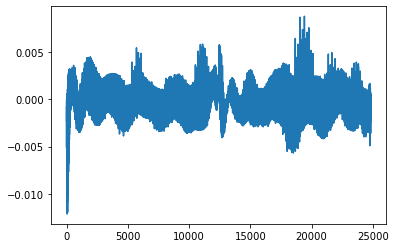

In [9]:
plt.plot(np.mean(scaled_dX, axis=0))

In [10]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(300, 24834)

In [11]:
A, b, CT = LA.svd(F, full_matrices=False)

In [12]:
b**2/(m-1)

array([5.07276886e-02, 2.34107864e-02, 2.17526629e-02, 1.92499085e-02,
       1.64161995e-02, 1.27676435e-02, 1.15149794e-02, 1.00017300e-02,
       8.64383756e-03, 7.50282890e-03, 7.20479611e-03, 6.02866957e-03,
       5.19092792e-03, 4.86282337e-03, 4.66295878e-03, 3.76875083e-03,
       3.26291384e-03, 2.99048416e-03, 2.97085970e-03, 2.66845726e-03,
       2.20796779e-03, 2.15839576e-03, 2.11489108e-03, 1.99283935e-03,
       1.76624089e-03, 1.63517661e-03, 1.48054097e-03, 1.34707637e-03,
       1.27770955e-03, 1.05492412e-03, 9.71766837e-04, 9.29664580e-04,
       8.66259925e-04, 8.08769195e-04, 7.85148952e-04, 6.79199998e-04,
       6.57137314e-04, 6.11877444e-04, 6.00234368e-04, 5.43631720e-04,
       4.97947618e-04, 4.90446118e-04, 4.58212300e-04, 4.08435089e-04,
       3.06782479e-04, 2.69926282e-04, 2.65883618e-04, 2.41059940e-04,
       2.36268695e-04, 2.33199404e-04, 2.31268230e-04, 2.09205281e-04,
       1.90225703e-04, 1.74254541e-04, 1.60111461e-04, 1.52485211e-04,
      

In [13]:
B = np.diag(b)

In [14]:
B = np.diag(b/np.sqrt(m-1))
B.shape, CT.shape

((300, 300), (300, 24834))

In [15]:
BCT = np.matmul(B, CT)

In [16]:
var_vec = b**2/(m-1)

In [17]:
n_eigval = 56

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {round(p1,2)} percent')

Total vairance captured by first 56 eigenvalues: 99.06 percent


In [18]:
n_eigval = 23

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {round(p1,2)} percent')

Total vairance captured by first 23 eigenvalues: 90.29 percent


In [19]:
n_eigval = 10

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {round(p1,2)} percent')

Total vairance captured by first 10 eigenvalues: 70.8 percent


In [20]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

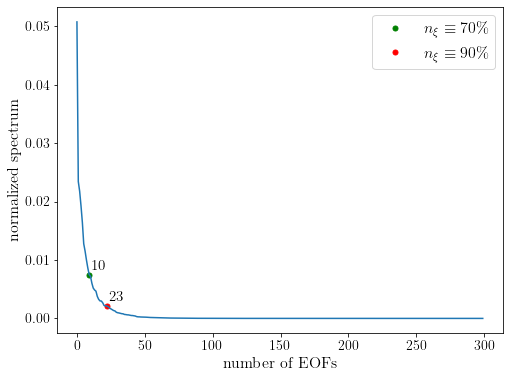

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(9,var_vec[9], 'go', ms=5, label=r'$n_{\xi} \equiv 70 \%$')
ax.plot(22,var_vec[22], 'ro', ms=5, label=r'$n_{\xi} \equiv 90 \%$')
ax.plot(np.arange(var_vec.size),var_vec)
ax.legend(loc = "upper right")
ax.set_xlabel(r"number of EOFs")
ax.set_ylabel(r"normalized spectrum")
ax.annotate(f"{23}", (22, var_vec[22]), fontsize= 15, textcoords="offset points", xytext=(10,5), ha= 'center')
ax.annotate(f"{10}", (9, var_vec[9]), fontsize= 15, textcoords="offset points", xytext=(10,5), ha= 'center')
plt.savefig('./plots/32x32_normalised_spectrum.pdf', bbox_inches='tight')

In [41]:
combined_vec = BCT
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((300, 24834), (300, 12417, 2))

In [42]:
xi_mat = detached_vec

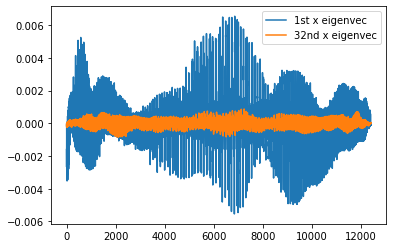

In [43]:
plt.plot(xi_mat[0,:,0], label='1st x eigenvec'), plt.plot(xi_mat[31,:,0], label='32nd x eigenvec')
plt.legend()

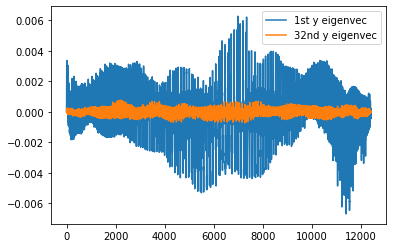

In [44]:
plt.plot(xi_mat[0,:,1], label='1st y eigenvec'), plt.plot(xi_mat[31,:,1], label='32nd y eigenvec')
plt.legend()

In [45]:
eig_vec = xi_mat[:56,:,:]
eig_vec.shape

(56, 12417, 2)

In [46]:
data_file = './calculated_xi_vectors/xi_matrix_56_eigvec_c_1_by_32_decor_t_1_Dt_t=50_to_t=110.npz'

np.savez(data_file, xi_mat = eig_vec)